In [3]:
from graph import Graph
from dijkstra import dijkstra_list, dijkstra_matrix
import time
import random
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Graph creation

In [2]:
list_graph = Graph(9, "adjacency_list")
matrix_graph = Graph(9, "adjacency_matrix")

# Add edges to list_graph
list_graph.add_edge(0, 1, 4)
list_graph.add_edge(0, 7, 8)
list_graph.add_edge(1, 2, 8)
list_graph.add_edge(1, 7, 11)
list_graph.add_edge(2, 3, 7)
list_graph.add_edge(2, 5, 4)
list_graph.add_edge(2, 8, 2)
list_graph.add_edge(3, 4, 9)

# Add edges to matrix_graph
matrix_graph.add_edge(0, 1, 4)
matrix_graph.add_edge(0, 7, 8)
matrix_graph.add_edge(1, 2, 8)
matrix_graph.add_edge(1, 7, 11)
matrix_graph.add_edge(2, 3, 7)
matrix_graph.add_edge(2, 5, 4)
matrix_graph.add_edge(2, 8, 2)
matrix_graph.add_edge(3, 4, 9)

In [3]:
print(list_graph)
print(matrix_graph)

0: [(1, 4), (7, 8)]
1: [(0, 4), (2, 8), (7, 11)]
2: [(1, 8), (3, 7), (5, 4), (8, 2)]
3: [(2, 7), (4, 9)]
4: [(3, 9)]
5: [(2, 4)]
6: []
7: [(0, 8), (1, 11)]
8: [(2, 2)]
[0, 4, 0, 0, 0, 0, 0, 8, 0]
[4, 0, 8, 0, 0, 0, 0, 11, 0]
[0, 8, 0, 7, 0, 4, 0, 0, 2]
[0, 0, 7, 0, 9, 0, 0, 0, 0]
[0, 0, 0, 9, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 11, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0]


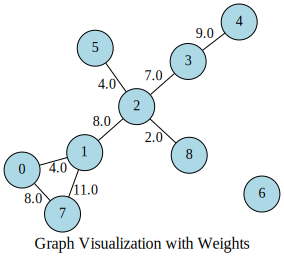

In [4]:
list_graph.visualize()

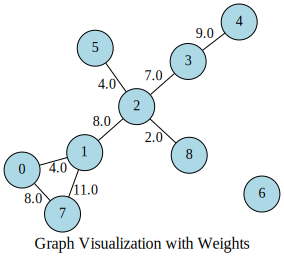

In [5]:
matrix_graph.visualize()

# Dijkstra test run

In [6]:
print(dijkstra_list(list_graph, 0))
print(dijkstra_matrix(matrix_graph, 0))

[0, 4, 12, 19, 28, 16, inf, 8, 14]
[0, 4, 12, 19, 28, 16, inf, 8, 14]


> ### (a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

#### Dijkstra Algorithm - Adjacency Matrix & Array Priority Queue
- Theoretical Complexity : O(|V|<sup>2</sup>)
- Total Complexity: O(|V|<sup>2</sup>) (Due to adjacency matrix)

#### Option A: Dijkstra's Algorithm with Increasing Graph Size

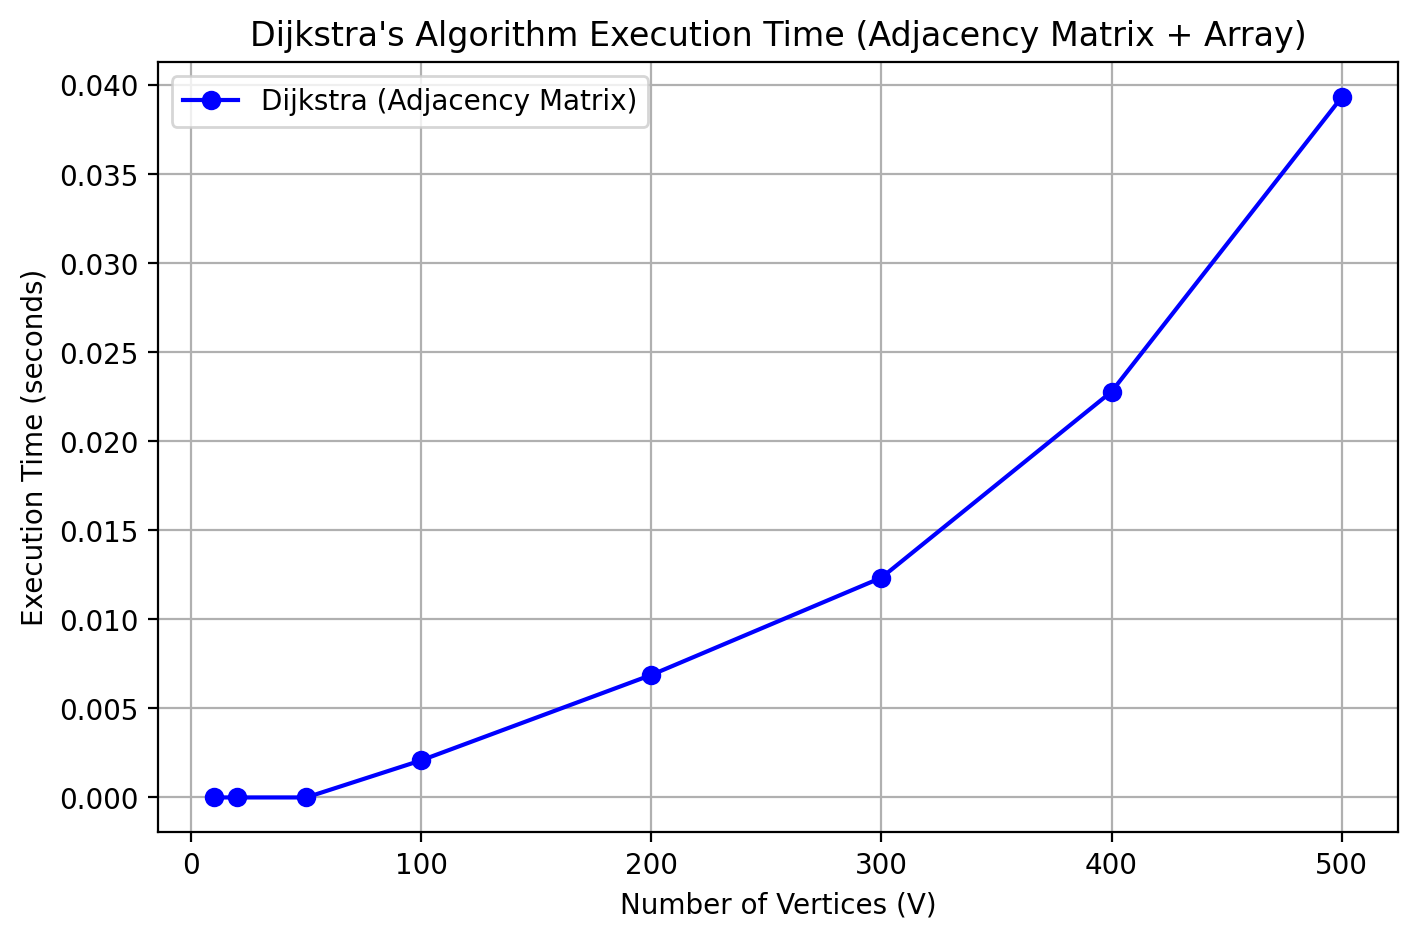

In [19]:
# Function to generate a random graph with adjacency matrix representation
def generate_random_matrix_graph(V, density=0.3):
    graph = Graph(V, "adjacency_matrix")
    
    for u in range(V):
        for v in range(u + 1, V):
            if random.random() < density:  # Randomly add edges
                weight = random.randint(1, 20)
                graph.add_edge(u, v, weight)

    return graph

# Measure execution time of Dijkstra's algorithm (adjacency matrix + array)
def benchmark_dijkstra_matrix(V, density=0.3):
    graph = generate_random_matrix_graph(V, density)
    
    start_time = time.time()
    dijkstra_matrix(graph, 0)
    return time.time() - start_time

# Experiment: Run Dijkstra on increasing graph sizes
V_values = [10, 20, 50, 100, 200, 300, 400, 500]
times = [benchmark_dijkstra_matrix(V) for V in V_values]

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(V_values, times, marker="o", linestyle="-", color="b", label="Dijkstra (Adjacency Matrix)")
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra's Algorithm Execution Time (Adjacency Matrix + Array)")
plt.legend()
plt.grid(True)
plt.show()


#### Option B: Dijkstra's Algorithm with Varying Edge Densities


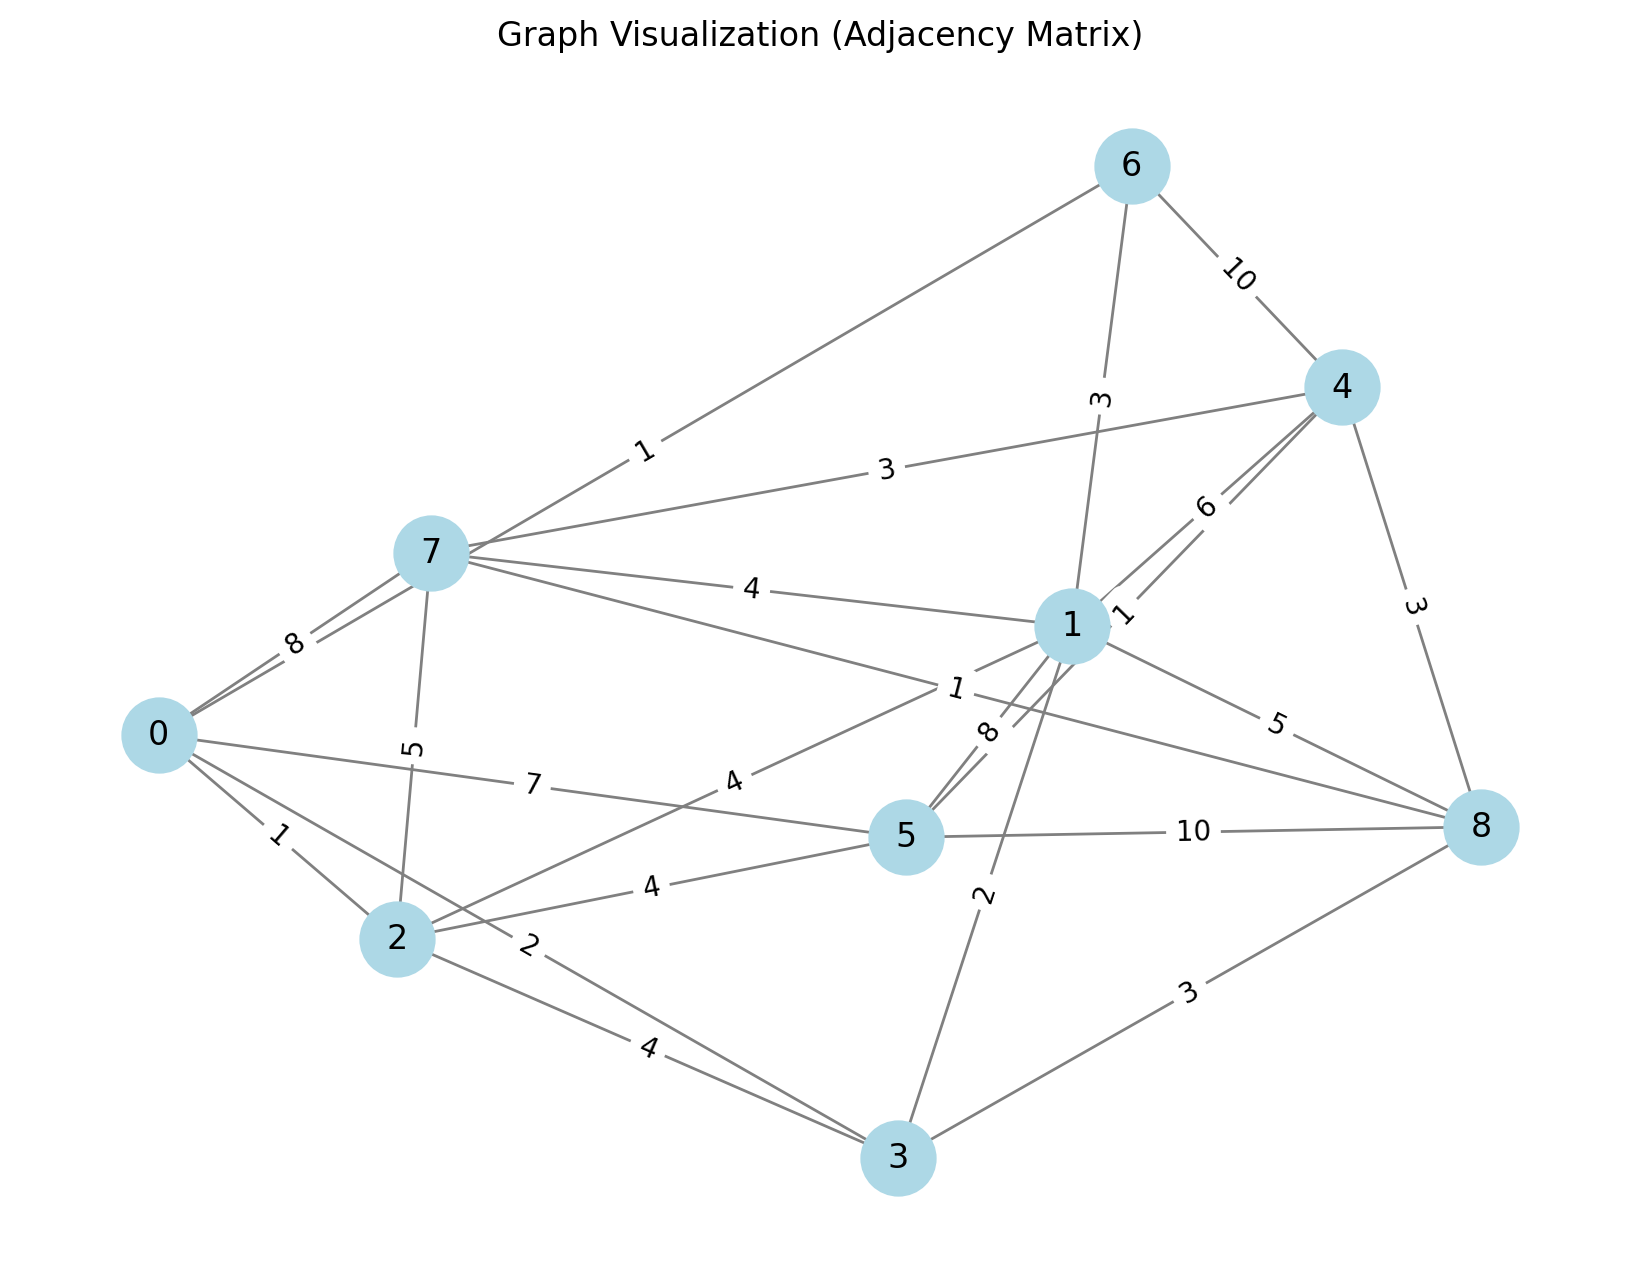

Graph Size: 5, Edge Density: 0.2, Time Taken: 0.00000 sec
Graph Size: 5, Edge Density: 0.4, Time Taken: 0.00000 sec
Graph Size: 5, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 5, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.2, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.4, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.2, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.4, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 50, Edge Density: 0.2, Time Taken: 0.00100 sec
Graph Size: 50, Edge Density: 0.4, Time Taken: 0.00100 sec
Graph Size: 50, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 50, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 100, Edge Density: 0.2, Time Taken: 0.00217 sec


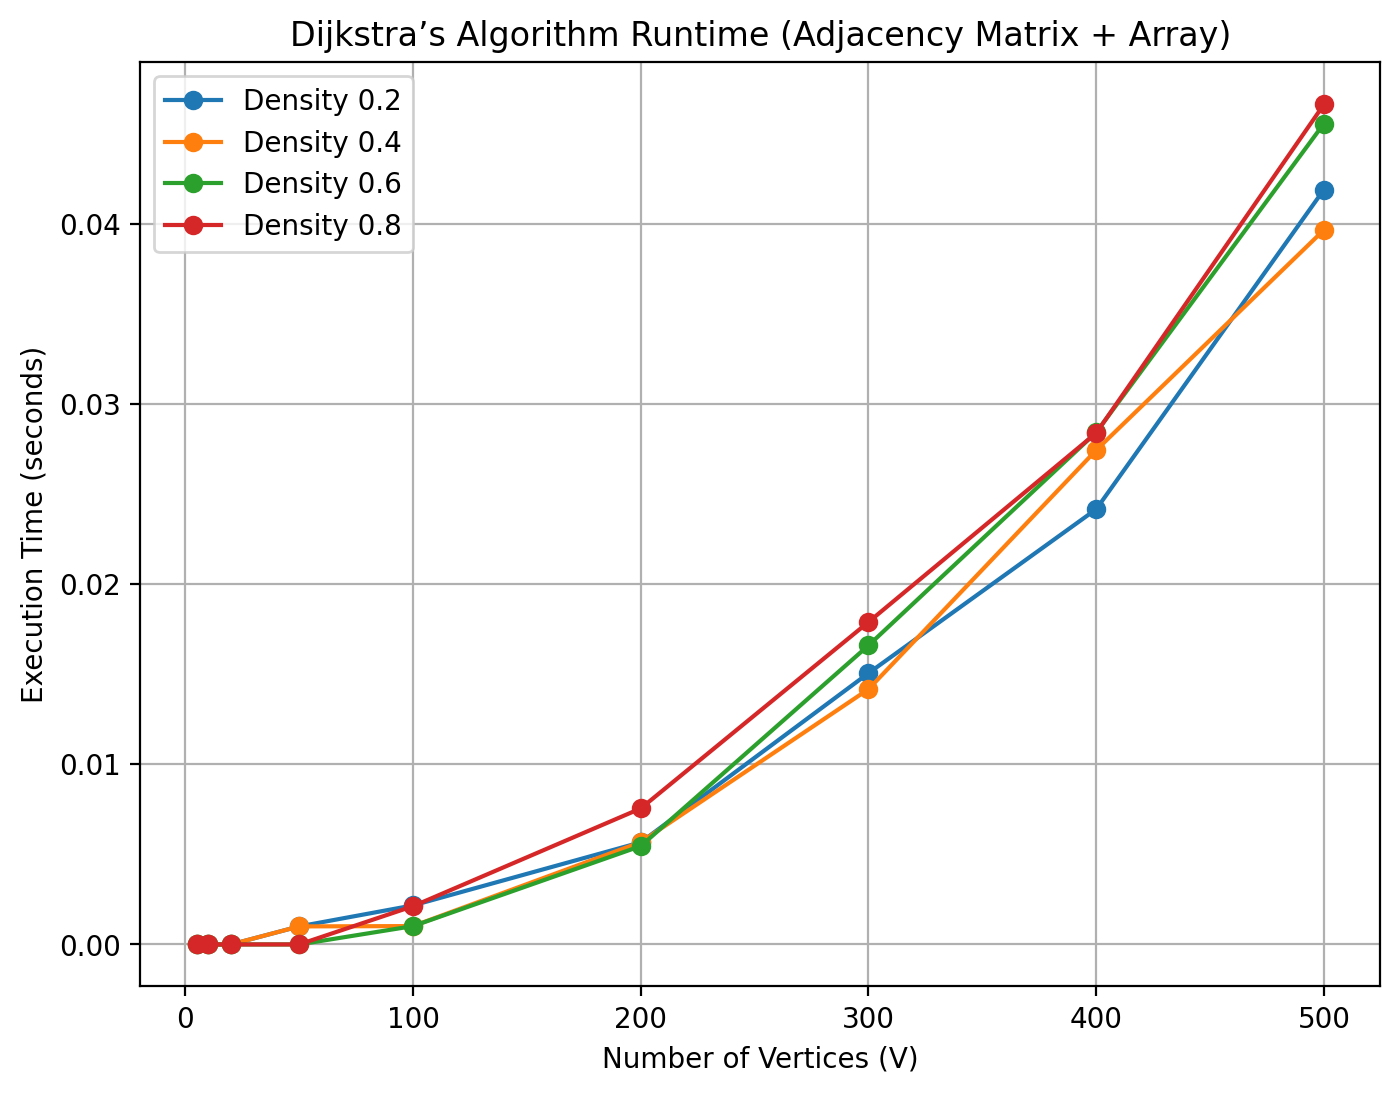

Shortest paths from node 0: [0, 4, 1, 2, 6, 5, 1, 6, 5]
Distance from node 0 to node 1: 4
Distance from node 0 to node 2: 1
Distance from node 0 to node 3: 2
Distance from node 0 to node 4: 6
Distance from node 0 to node 5: 5
Distance from node 0 to node 6: 1
Distance from node 0 to node 7: 6
Distance from node 0 to node 8: 5


In [20]:
def generate_graph_matrix(size, edge_density=0.5):
    """Generate a random adjacency matrix graph."""
    graph = Graph(size, "adjacency_matrix")
    num_edges = int(size * (size - 1) * edge_density)  # Approximate number of edges
    for _ in range(num_edges):
        u, v = random.sample(range(size), 2)
        weight = random.randint(1, 10)
        graph.add_edge(u, v, weight)
    return graph


def draw_graph(graph):
    """Visualize the graph using networkx and matplotlib."""
    G = nx.Graph()

    # Add edges with weights
    for u in range(graph.vertices):
        for v in range(graph.vertices):
            if graph.adj_matrix[u][v] > 0:
                G.add_edge(u, v, weight=graph.adj_matrix[u][v])

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization (Adjacency Matrix)")
    plt.show()


def measure_runtime():
    """Measure Dijkstra's runtime for increasing graph sizes and edge densities."""
    sizes = [5, 10, 20, 50, 100, 200, 300, 400, 500]  # Different graph sizes
    edge_densities = [0.2, 0.4, 0.6, 0.8]  # Different edge densities
    times = {size: [] for size in sizes}  # Initialize a dictionary to store times for each size

    # Testing graph size vs runtime
    for size in sizes:
        for density in edge_densities:
            graph = generate_graph_matrix(size, density)

            start_time = time.time()
            dijkstra_matrix(graph, 0)  # Run Dijkstra on vertex 0
            end_time = time.time()

            times[size].append(end_time - start_time)
            print(f"Graph Size: {size}, Edge Density: {density}, Time Taken: {end_time - start_time:.5f} sec")

    # Now plot runtime for each edge density
    plt.figure(figsize=(8, 6))

    # Plot times for different edge densities
    for i, density in enumerate(edge_densities):
        # Collect corresponding times for this density
        density_times = [times[size][i] for size in sizes]
        plt.plot(sizes, density_times, marker='o', linestyle='-', label=f"Density {density}")

    plt.xlabel("Number of Vertices (V)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra’s Algorithm Runtime (Adjacency Matrix + Array)")
    plt.legend()
    plt.grid()
    plt.show()



def test_dijkstra_correctness(graph):
    """Test the correctness of Dijkstra’s algorithm for the given graph."""
    # Run Dijkstra’s algorithm
    shortest_paths = dijkstra_matrix(graph, 0)

    # Verify the correctness: Check that the shortest paths are valid
    # This is a simplified check: for a more complex graph, you could compute the actual shortest path

    print("Shortest paths from node 0:", shortest_paths)
    for i in range(graph.vertices):
        if i != 0:
            print(f"Distance from node 0 to node {i}: {shortest_paths[i]}")


# Generate and visualize a random graph (for testing)
graph = generate_graph_matrix(9, edge_density=0.5)
draw_graph(graph)

# Measure and plot runtime
measure_runtime()

# Run correctness test
test_dijkstra_correctness(graph)


#### Conclusion Dijkstra Algorithm - Adjacency Matrix & Array Priority Queue

In our experiments, the execution time increases quadratically as the number of vertices (|V|) grows. This matches the theoretical complexity of O(|V|<sup>2</sup>), confirming that the adjacency matrix representation drives the time complexity.

# (b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and we use a minimizing heap for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

## Dijkstra Algorithm - Adjacent List, Min Heap Priority Queue
- Theoretical Complexity: O(|V| + |E| * log |V|)

- Total Complexity: O|V| + O(|V|log|V|) + O(|E|log|V|) = O(|V+E| log|V|)

In [26]:
def generate_graph_list(size, edge_density=0.5):
    """Generate a random adjacency list graph."""
    graph = Graph(size, "adjacency_list")
    num_edges = int(size * (size - 1) * edge_density)

    # Ensure connectivity via spanning tree
    for u in range(size - 1):
        v = u + 1
        weight = random.randint(1, 10)
        graph.add_edge(u, v, weight)

    # Add remaining random edges
    extra_edges_needed = num_edges - (size - 1)
    edges_added = 0

    while edges_added < extra_edges_needed:
        #print(f"Edges added: {edges_added} / {extra_edges_needed}")  # Debug
        u, v = random.sample(range(size), 2)
        # Prevent duplicates
        if not any(neigh == v for neigh, _ in graph.adj_list[u]):
            weight = random.randint(1, 10)
            graph.add_edge(u, v, weight)
            edges_added += 1

    return graph

In [38]:
def generate_graph_list(size, edge_density=0.5):
    """Generate a random adjacency list graph with a given edge density."""
    graph = Graph(size, "adjacency_list")
    num_edges = int(size * (size - 1) / 2 * edge_density)  # Undirected graph max edges

    # Ensure connectivity (spanning tree)
    for u in range(size - 1):
        v = u + 1
        weight = random.randint(1, 10)
        graph.add_edge(u, v, weight)

    # Track edges to prevent duplicates (sorted to handle undirected edges)
    existing_edges = set()
    for u in range(size):
        for v, _ in graph.adj_list[u]:
            existing_edges.add(tuple(sorted((u, v))))

    extra_edges_needed = num_edges - (size - 1)
    edges_added = 0

    attempts = 0
    max_attempts = 10000  # Safety check to avoid infinite loops

    while edges_added < extra_edges_needed:
        u, v = random.sample(range(size), 2)
        edge = tuple(sorted((u, v)))

        if edge not in existing_edges:
            weight = random.randint(1, 10)
            graph.add_edge(u, v, weight)
            existing_edges.add(edge)
            edges_added += 1

        attempts += 1
        if attempts > max_attempts:
            print("Warning: Too many attempts to add edges. Breaking out of loop.")
            break

    return graph

In [116]:
def generate_graph_list(size, edge_density=0.5):
    """Efficiently generate a random adjacency list graph."""
    graph = Graph(size, "adjacency_list")
    max_edges = size * (size - 1) // 2
    num_edges = int(max_edges * edge_density)

    # Step 1: Create all possible edges (undirected, so u < v)
    all_edges = [(u, v) for u in range(size) for v in range(u + 1, size)]

    # Step 2: Shuffle edges randomly
    random.shuffle(all_edges)

    # Step 3: Pick the first num_edges edges
    selected_edges = all_edges[:num_edges]

    # Step 4: Add edges with random weights
    for u, v in selected_edges:
        weight = random.randint(1, 10)
        graph.add_edge(u, v, weight)

    return graph

Running empirical tests with dijkstra_list()...

Generating graph with |V|=100, |E|=500...
Completed in 0.000000 seconds

Generating graph with |V|=500, |E|=3000...
Completed in 0.001004 seconds

Generating graph with |V|=1000, |E|=8000...
Completed in 0.002007 seconds

Generating graph with |V|=3000, |E|=15000...
Completed in 0.005924 seconds

Generating graph with |V|=5000, |E|=30000...
Completed in 0.012238 seconds



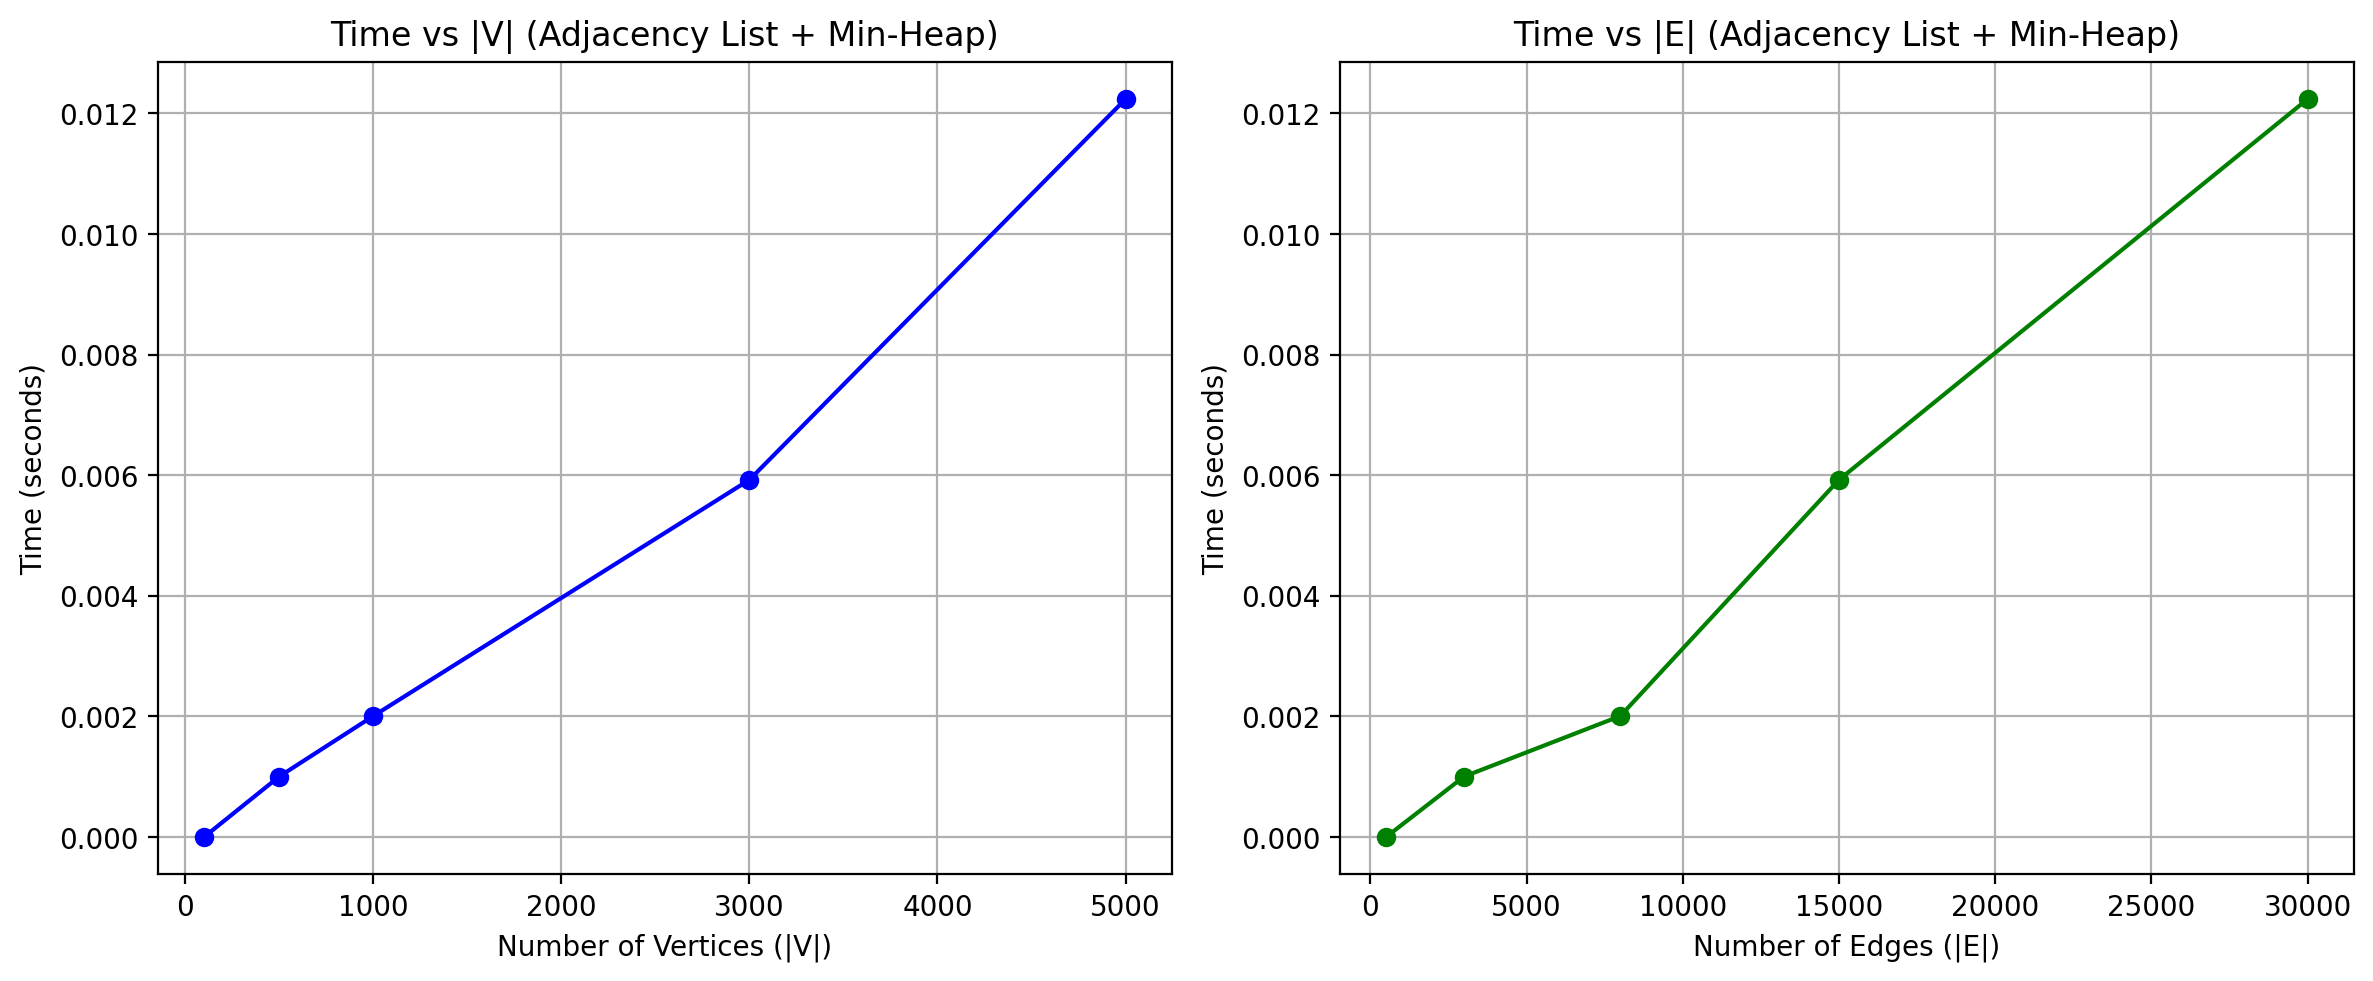

In [118]:
def empirical_test_and_plot():
    random.seed(42)  # Reproducibility

    sizes = [
        (100, 500),
        (500, 3000),
        (1000, 8000),
        (3000, 15000),
        (5000, 30000)
    ]
    #sizes = [(10, 20), (20, 40), (50, 200)]
    vertices_list = []
    edges_list = []
    times_list = []

    print("Running empirical tests with dijkstra_list()...\n")
    for V, E in sizes:
        print(f"Generating graph with |V|={V}, |E|={E}...")
        edge_density = E / (V * (V - 1))
        graph = generate_graph_list(V, edge_density=edge_density)

        start_time = time.time()
        distances = dijkstra_list(graph, 0)
        elapsed_time = time.time() - start_time

        print(f"Completed in {elapsed_time:.6f} seconds\n")

        vertices_list.append(V)
        edges_list.append(E)
        times_list.append(elapsed_time)

    # Plotting results
    plt.figure(figsize=(12, 5))

    # Time vs |V|
    plt.subplot(1, 2, 1)
    plt.plot(vertices_list, times_list, 'o-', color='blue')
    plt.xlabel("Number of Vertices (|V|)")
    plt.ylabel("Time (seconds)")
    plt.title("Time vs |V| (Adjacency List + Min-Heap)")
    plt.grid(True)

    # Time vs |E|
    plt.subplot(1, 2, 2)
    plt.plot(edges_list, times_list, 'o-', color='green')
    plt.xlabel("Number of Edges (|E|)")
    plt.ylabel("Time (seconds)")
    plt.title("Time vs |E| (Adjacency List + Min-Heap)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run the test and plot
empirical_test_and_plot()

In [148]:
def draw_graph(graph):
    """Visualize the graph (adjacency list) using networkx and matplotlib."""
    G = nx.Graph()

    # Add edges with weights
    for u in range(graph.vertices):
        for v, weight in graph.adj_list[u]:
            if u < v:  # Avoid adding both directions for undirected graphs
                G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization (Adjacency List)")
    plt.show()

def measure_runtime():
    """Measure Dijkstra's runtime for increasing graph sizes and edge densities (Adjacency List + Min-Heap)."""
    sizes = [5, 10, 20, 50, 100, 200, 300, 400, 500]
    edge_densities = [0.2, 0.4, 0.6, 0.8]
    times = {size: [] for size in sizes}

    print("Running runtime measurements on adjacency list graphs...\n")
    for size in sizes:
        for density in edge_densities:
            print(f"Generating graph |V|={size}, density={density}...")
            graph = generate_graph_list(size, density)

            start_time = time.time()
            dijkstra_list(graph, 0)
            end_time = time.time()

            elapsed_time = end_time - start_time
            times[size].append(elapsed_time)
            print(f"Completed in {elapsed_time:.6f} seconds\n")

    # Plotting runtime for each edge density
    plt.figure(figsize=(8, 6))

    for i, density in enumerate(edge_densities):
        density_times = [times[size][i] for size in sizes]
        plt.plot(sizes, density_times, marker='o', linestyle='-', label=f"Density {density}")

    plt.xlabel("Number of Vertices (V)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra’s Algorithm Runtime (Adjacency List + Min-Heap)")
    plt.legend()
    plt.grid()
    plt.show()

def test_dijkstra_correctness(graph):
    """Test the correctness of Dijkstra’s algorithm on an adjacency list graph."""
    shortest_paths = dijkstra_list(graph, 0)

    print("Shortest paths from node 0:", shortest_paths)
    for i in range(graph.vertices):
        if i != 0:
            print(f"Distance from node 0 to node {i}: {shortest_paths[i]}")

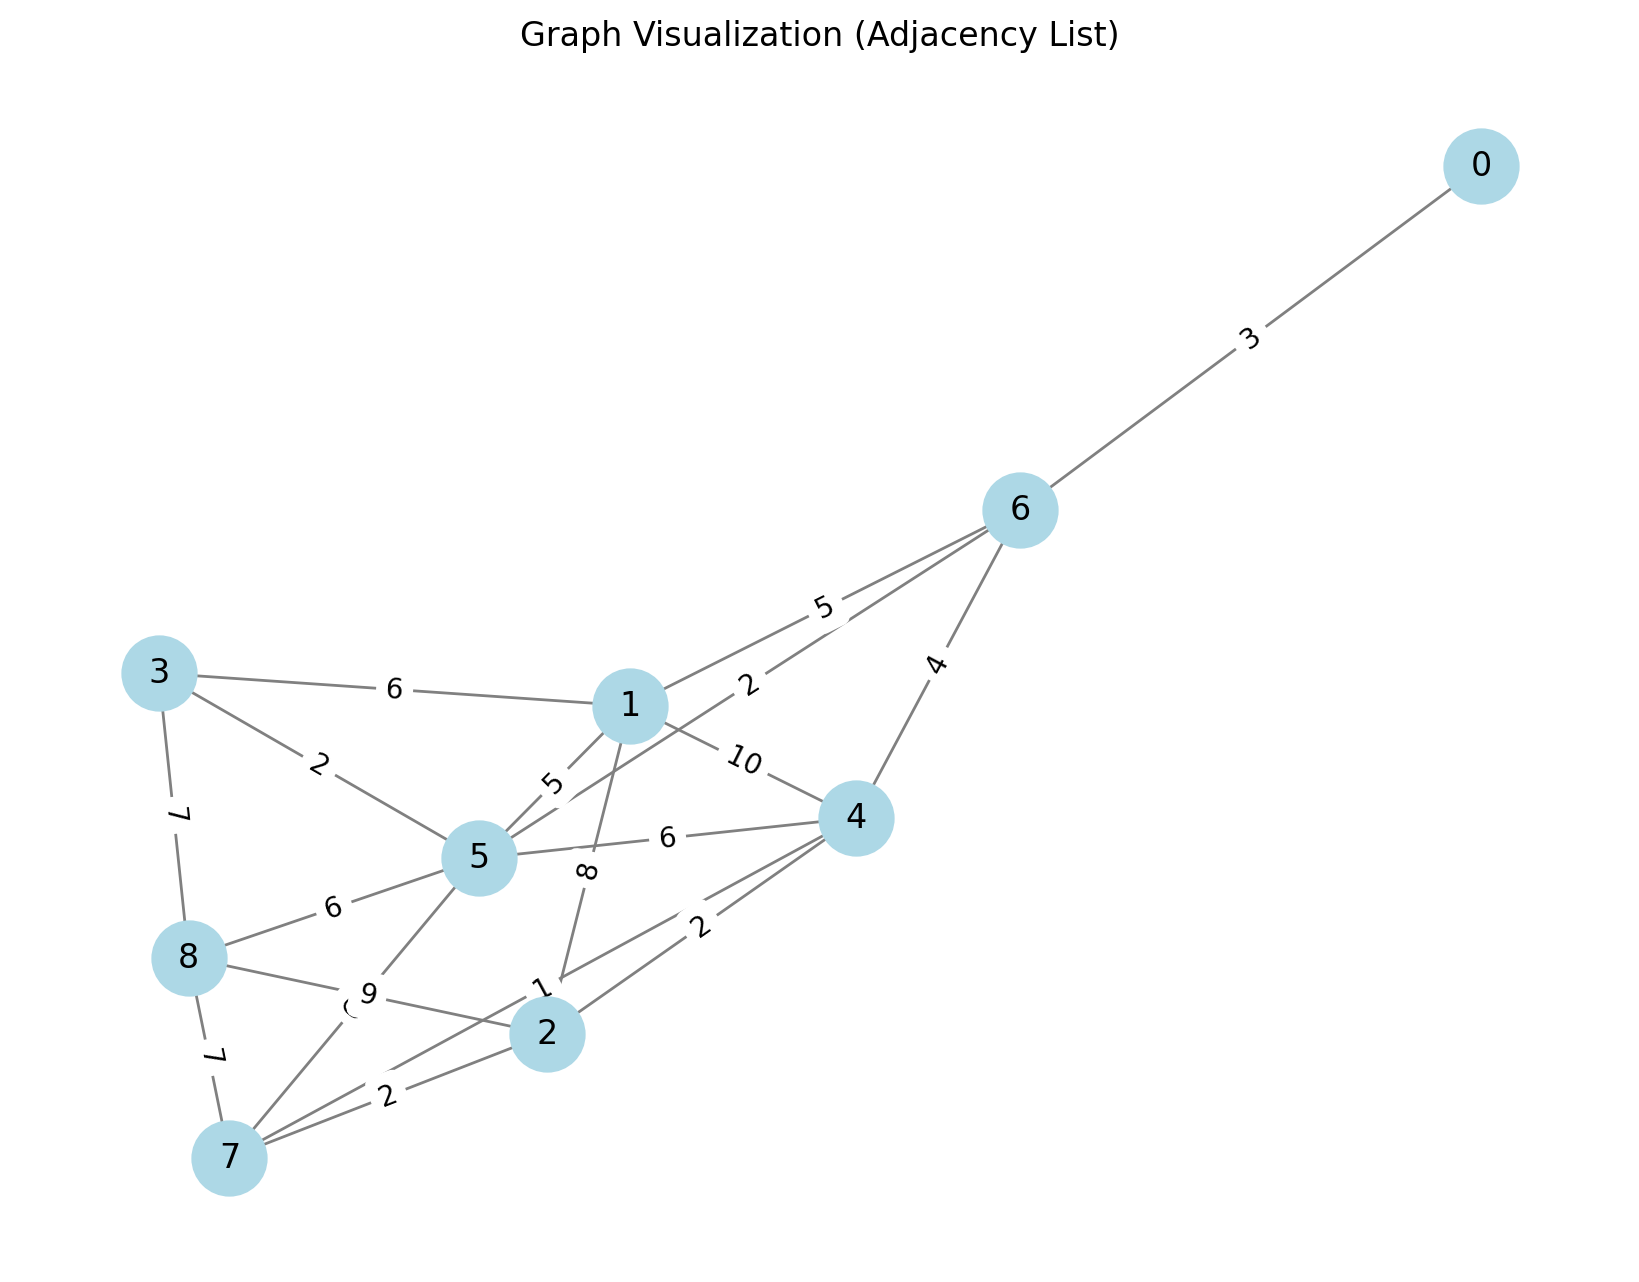

In [150]:
# Main Execution Flow
random.seed(42)
# Generate and visualize a graph
graph = generate_graph_list(9, edge_density=0.5)
draw_graph(graph)

Running runtime measurements on adjacency list graphs...

Generating graph |V|=5, density=0.2...
Completed in 0.000000 seconds

Generating graph |V|=5, density=0.4...
Completed in 0.000000 seconds

Generating graph |V|=5, density=0.6...
Completed in 0.000000 seconds

Generating graph |V|=5, density=0.8...
Completed in 0.000000 seconds

Generating graph |V|=10, density=0.2...
Completed in 0.000000 seconds

Generating graph |V|=10, density=0.4...
Completed in 0.000000 seconds

Generating graph |V|=10, density=0.6...
Completed in 0.000000 seconds

Generating graph |V|=10, density=0.8...
Completed in 0.000000 seconds

Generating graph |V|=20, density=0.2...
Completed in 0.000000 seconds

Generating graph |V|=20, density=0.4...
Completed in 0.000000 seconds

Generating graph |V|=20, density=0.6...
Completed in 0.000000 seconds

Generating graph |V|=20, density=0.8...
Completed in 0.000000 seconds

Generating graph |V|=50, density=0.2...
Completed in 0.000000 seconds

Generating graph |V|=50

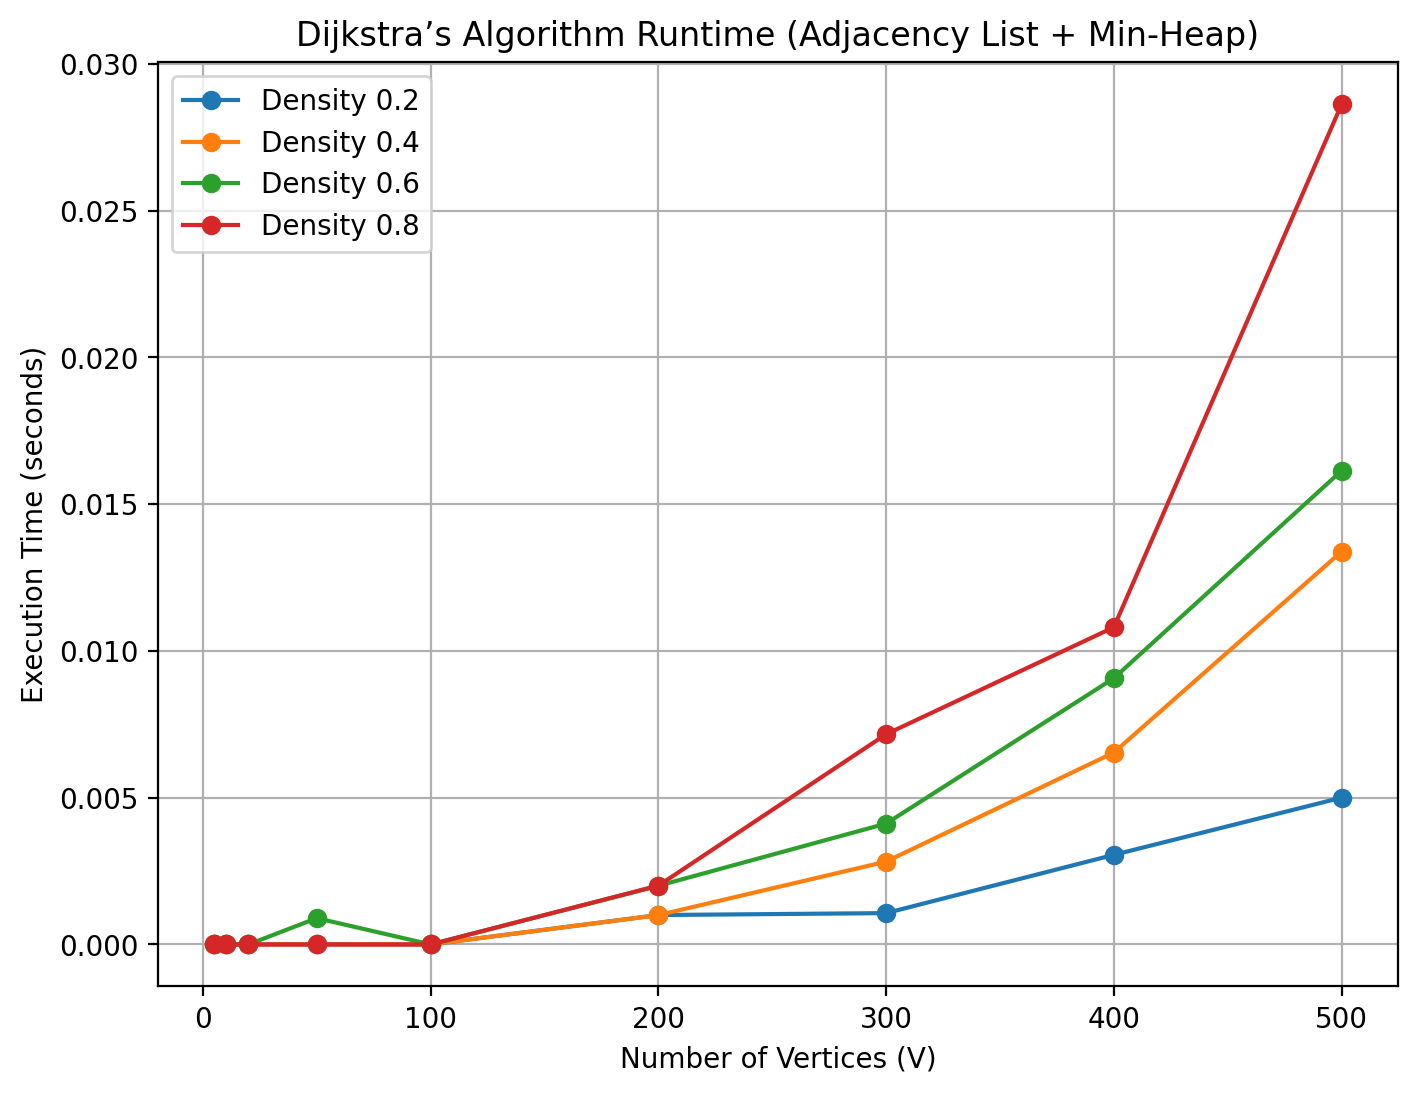

In [156]:
# Measure runtime and plot results
random.seed(42)
measure_runtime()

In [126]:
# Check correctness on the graph
random.seed(42)
test_dijkstra_correctness(graph)

Shortest paths from node 0: [0, 8, 9, 7, 7, 5, 3, 8, 11]
Distance from node 0 to node 1: 8
Distance from node 0 to node 2: 9
Distance from node 0 to node 3: 7
Distance from node 0 to node 4: 7
Distance from node 0 to node 5: 5
Distance from node 0 to node 6: 3
Distance from node 0 to node 7: 8
Distance from node 0 to node 8: 11


## Conclusion Dijkstra Algorithm - Adjacency List & Min-Heap Priority Queue


## (c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances. 

In [130]:
# Run and time Dijkstra's algorithms for both graph types
def measure_runtime_comparison(sizes, densities):
    times_matrix = {}  # {density: [times]}
    times_list = {}    # {density: [times]}

    print("Running runtime comparison...")

    for density in densities:
        times_matrix[density] = []
        times_list[density] = []
        print(f"\nEdge density: {density}\n")

        for size in sizes:
            print(f"  Graph size: {size}")

            # Generate both graphs
            graph_mat = generate_graph_matrix(size, density)
            graph_lst = generate_graph_list(size, density)

            # Time Adjacency Matrix + Array Priority Queue
            start_time = time.time()
            dijkstra_matrix(graph_mat, 0)
            elapsed_matrix = time.time() - start_time
            times_matrix[density].append(elapsed_matrix)

            # Time Adjacency List + Min-Heap
            start_time = time.time()
            dijkstra_list(graph_lst, 0)
            elapsed_list = time.time() - start_time
            times_list[density].append(elapsed_list)

            print(f"    Matrix (Array PQ): {elapsed_matrix:.6f} s")
            print(f"    List (Min-Heap):  {elapsed_list:.6f} s")

    return times_matrix, times_list

# Plot the results
def plot_runtime_comparison(sizes, times_matrix, times_list, densities):
    plt.figure(figsize=(12, 6))

    for density in densities:
        plt.plot(sizes, times_matrix[density], 'o-', label=f"Matrix + Array PQ (density={density})")
        plt.plot(sizes, times_list[density], 'x--', label=f"List + Min-Heap PQ (density={density})")

    plt.xlabel("Number of Vertices (|V|)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra’s Algorithm Runtime: Matrix vs List")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Running runtime comparison...

Edge density: 0.1

  Graph size: 5
    Matrix (Array PQ): 0.000000 s
    List (Min-Heap):  0.000000 s
  Graph size: 10
    Matrix (Array PQ): 0.000000 s
    List (Min-Heap):  0.000000 s
  Graph size: 20
    Matrix (Array PQ): 0.000000 s
    List (Min-Heap):  0.000000 s
  Graph size: 50
    Matrix (Array PQ): 0.000000 s
    List (Min-Heap):  0.000000 s
  Graph size: 100
    Matrix (Array PQ): 0.001001 s
    List (Min-Heap):  0.000000 s
  Graph size: 200
    Matrix (Array PQ): 0.001998 s
    List (Min-Heap):  0.000000 s
  Graph size: 300
    Matrix (Array PQ): 0.006027 s
    List (Min-Heap):  0.000960 s
  Graph size: 400
    Matrix (Array PQ): 0.014518 s
    List (Min-Heap):  0.002001 s
  Graph size: 500
    Matrix (Array PQ): 0.018016 s
    List (Min-Heap):  0.003080 s

Edge density: 0.2

  Graph size: 5
    Matrix (Array PQ): 0.000000 s
    List (Min-Heap):  0.000000 s
  Graph size: 10
    Matrix (Array PQ): 0.000000 s
    List (Min-Heap):  0.000000 s
  G

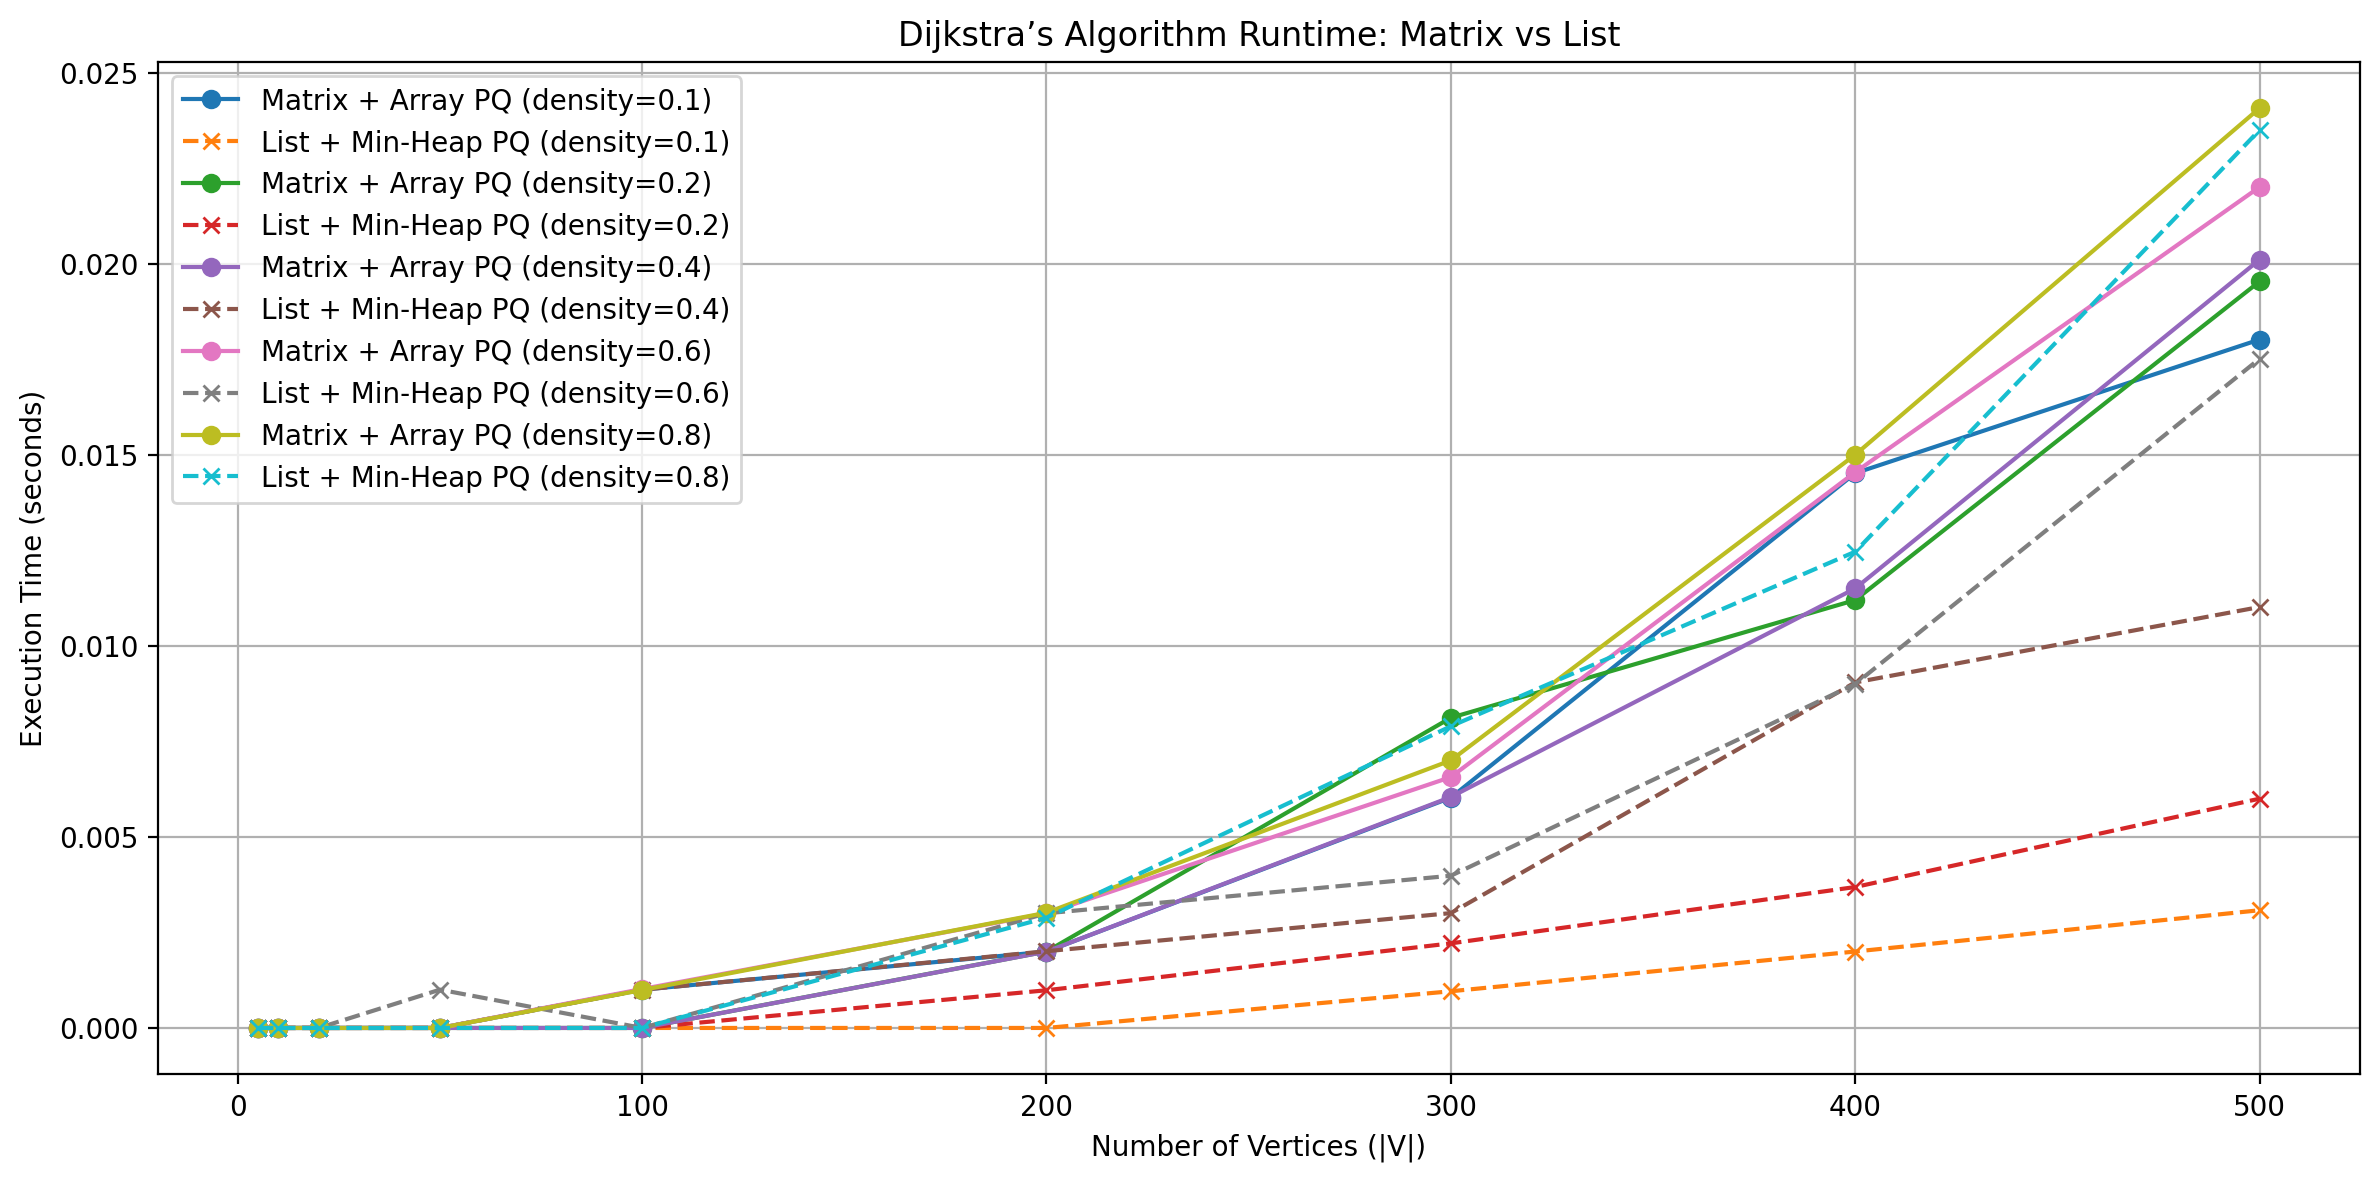

In [162]:
# ========== Main Execution ==========

random.seed(42)

# Define test sizes and densities
sizes = [5, 10, 20, 50, 100, 200, 300, 400, 500]      
densities = [0.1, 0.2, 0.4, 0.6, 0.8]       

# Measure and compare runtimes
times_matrix, times_list = measure_runtime_comparison(sizes, densities)

# Plot the comparison
plot_runtime_comparison(sizes, times_matrix, times_list, densities)